# Analyze Your Netflix Data
Netflix has increased their prices several times over the last few years, and I wonder how much value my household is currently getting out of our subscription.
Since ascribing a value to a subjective enjoyment would be almost impossible, the metric we will use is *Hours Watched per Dollar* (h/$) where the a higher number means more value.

First step is to gather my netflix data. If you wish to run this report with your own data, follow the steps listed [here](./Gather%20Netflix%20Data.ipynb).

Next we can use the python library [pandas](https://pandas.pydata.org/about/index.html) to import and analyize the data

## Preparing Data: Viewing Activity

### Import Data

The report that we are using is `ViewingActivity.csv`. In the download from Netflix, in the PDF [`Cover Sheet.pdf`](./files/Cover%20Sheet.pdf) on page 11 we can find a full description of the data that each column holds. A summary of the data is as follows:

|Column Name | Description |
| --- | --- |
| Profile Name | The profile which viewed the program |
| Start Time | The UTC date and time viewing started. |
| Duration | Length of the viewing session |
| Attributes | Shows additional details of interactions with streamed content, where available. |
| Title | The Program viewed. |
| Supplemental Video Type | Videos other than a TV show or movie, such as trailers or montages |
| Device type | Device type from which the program was streamed |
| Bookmark | Most recent viewing position from the playback session of the program. |
| Latest Bookmark | Indicates whether the Bookmark is the most recent viewing postions. *Not latest view* indicates that it is not the most recent playback |
| Country | Country from which the program was viewed. |

Note: The term *program* can mean either a TV show or a movie.

Let pull in the data.

In [1]:
import pandas as pd
df_views = pd.read_csv(r'./files/ViewingActivity_sanitized.csv')
df_views.head()

,Duration,Start Time,Profile Name,Country,Bookmark,Latest Bookmark,Supplemental Video Type,Attributes,Device Type,Title
0,00:08:58,2025-07-29 04:47:41,Profile 1,US (United States),00:09:03,00:09:03,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Friend or Foe (Episod...
1,00:56:34,2025-07-29 03:50:40,Profile 1,US (United States),01:00:56,01:00:56,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Possible Outcomes (Ep...
2,00:31:24,2025-07-29 03:19:00,Profile 1,US (United States),01:09:15,01:09:15,NaN,NaN,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6)
3,00:00:09,2025-07-29 01:54:00,Profile 2,US (United States),00:00:09,00:00:09,HOOK,Autoplayed: user action: None;,Amazon Fire TV Stick 2020 + Streaming Stick,Evil: Season 1_hook_primary_16x9_backfill
4,00:33:14,2025-07-29 01:53:00,Profile 1,US (United States),00:33:14,Not latest view,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6)


### Examine, Transform, and Clean the data

Before workking with the report we need to understand more about the overall data.

Lets start with the type of data in each column

In [2]:
df_views.dtypes

Duration                   object
Start Time                 object
Profile Name               object
Country                    object
Bookmark                   object
Latest Bookmark            object
Supplemental Video Type    object
Attributes                 object
Device Type                object
Title                      object
dtype: object

We will want to work with times, dates, and duration, and thus we need to transform the columns `Duration` and `Start Time` into usable datatypes.

In [3]:
df_views['Start Time'] = pd.to_datetime(df_views['Start Time'], utc=True)
df_views['Duration'] = pd.to_timedelta(df_views['Duration'])

We can also transform `Latest Bookmark` into a boolean value, and `Bookmark` into a duration.

In [4]:
df_views['Latest Bookmark'] = df_views['Latest Bookmark'] == df_views['Bookmark']
df_views['Bookmark'] = pd.to_timedelta(df_views['Bookmark'])

Next we'll add a `Date` column

In [5]:
df_views['Date'] = df_views['Start Time'].apply(lambda x: x.replace(day=1))
df_views.head()

,Duration,Start Time,Profile Name,Country,Bookmark,Latest Bookmark,Supplemental Video Type,Attributes,Device Type,Title,Date
0,0 days 00:08:58,2025-07-29 04:47:41+00:00,Profile 1,US (United States),0 days 00:09:03,True,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Friend or Foe (Episod...,2025-07-01 04:47:41+00:00
1,0 days 00:56:34,2025-07-29 03:50:40+00:00,Profile 1,US (United States),0 days 01:00:56,True,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Possible Outcomes (Ep...,2025-07-01 03:50:40+00:00
2,0 days 00:31:24,2025-07-29 03:19:00+00:00,Profile 1,US (United States),0 days 01:09:15,True,NaN,NaN,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6),2025-07-01 03:19:00+00:00
3,0 days 00:00:09,2025-07-29 01:54:00+00:00,Profile 2,US (United States),0 days 00:00:09,True,HOOK,Autoplayed: user action: None;,Amazon Fire TV Stick 2020 + Streaming Stick,Evil: Season 1_hook_primary_16x9_backfill,2025-07-01 01:54:00+00:00
4,0 days 00:33:14,2025-07-29 01:53:00+00:00,Profile 1,US (United States),0 days 00:33:14,False,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6),2025-07-01 01:53:00+00:00


Lets look at how much data we have by pulling the shape of the dataframe, which is returned in the form of `(row count, column count)`

In [6]:
df_views.shape

(15196, 11)

This is showing that we have 15196 rows and 10 columns.

Not all pf those rows are programs, so we can filter them out using the column `Supplemental Video Type`. Before we do, lets review what unique values are in that column.

In [7]:
df_views['Supplemental Video Type'].value_counts()

Supplemental Video Type
HOOK              871
TRAILER           364
CINEMAGRAPH        54
TEASER_TRAILER     48
RECAP               7
CHARACTER           1
PREVIEW             1
Name: count, dtype: int64

We don't want to include any of these values, so lets filter them out of the data.

In [8]:
df_views = df_views.loc[df_views['Supplemental Video Type'].isnull()]
df_views.head()

,Duration,Start Time,Profile Name,Country,Bookmark,Latest Bookmark,Supplemental Video Type,Attributes,Device Type,Title,Date
0,0 days 00:08:58,2025-07-29 04:47:41+00:00,Profile 1,US (United States),0 days 00:09:03,True,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Friend or Foe (Episod...,2025-07-01 04:47:41+00:00
1,0 days 00:56:34,2025-07-29 03:50:40+00:00,Profile 1,US (United States),0 days 01:00:56,True,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Possible Outcomes (Ep...,2025-07-01 03:50:40+00:00
2,0 days 00:31:24,2025-07-29 03:19:00+00:00,Profile 1,US (United States),0 days 01:09:15,True,NaN,NaN,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6),2025-07-01 03:19:00+00:00
4,0 days 00:33:14,2025-07-29 01:53:00+00:00,Profile 1,US (United States),0 days 00:33:14,False,NaN,Autoplayed: user action: User_Interaction;,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,Physical: 100: Season 2: Mine (Episode 6),2025-07-01 01:53:00+00:00
6,0 days 01:29:06,2025-07-29 00:22:20+00:00,Profile 1,US (United States),0 days 01:29:06,True,NaN,NaN,Vizio MG186 MT5597DV CAST/HYBRID INX Smart TV,KPop Demon Hunters,2025-07-01 00:22:20+00:00


In [9]:
df_views.shape

(13850, 11)

Filtering `Supplemental Video Type` still leaves us with over 13 thousand programs views. We can simply this by summing up views by month.

In [10]:
df_views_by_month = df_views
df_views_by_month = df_views_by_month.set_index('Date')
df_views_by_month = df_views_by_month['Duration'].resample('MS').sum().to_frame()
df_views_by_month

,Duration
Date,
2010-01-01 00:00:00+00:00,0 days 03:50:47
2010-02-01 00:00:00+00:00,0 days 03:34:36
2010-03-01 00:00:00+00:00,0 days 01:18:08
2010-04-01 00:00:00+00:00,0 days 00:00:00
2010-05-01 00:00:00+00:00,0 days 00:44:56
...,...
2025-03-01 00:00:00+00:00,2 days 01:36:29
2025-04-01 00:00:00+00:00,1 days 04:56:16
2025-05-01 00:00:00+00:00,3 days 22:04:39


### Visualize

Lets look at the viewing usage over time. We will need to add a new column that converts the duration into hours.

In [11]:
import numpy as np

df_views_by_month['total_hours'] = df_views_by_month['Duration'] / np.timedelta64(1, 'h')
df_views_by_month.head()

,Duration,total_hours
Date,,
2010-01-01 00:00:00+00:00,0 days 03:50:47,3.846389
2010-02-01 00:00:00+00:00,0 days 03:34:36,3.576667
2010-03-01 00:00:00+00:00,0 days 01:18:08,1.302222
2010-04-01 00:00:00+00:00,0 days 00:00:00,0.000000
2010-05-01 00:00:00+00:00,0 days 00:44:56,0.748889


Now we can plot the data.

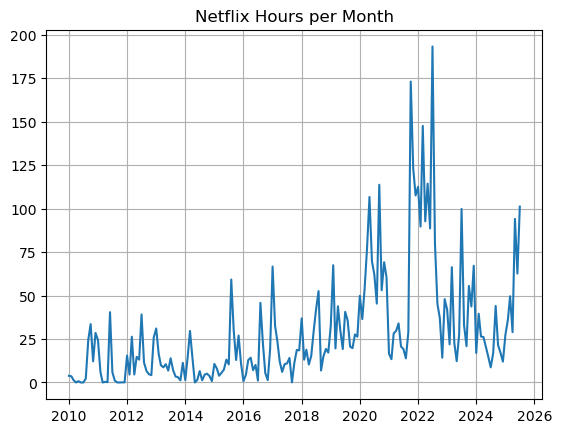

In [12]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits

from annotate_chart import annot_max, annot_min

views_fig, views_ax = plt.subplots()
views_ax.set_title("Netflix Hours per Month")
views_ax.plot(df_views_by_month.index, df_views_by_month.total_hours)
# views_ax.yaxis.set_major_formatter(lambda x, _: f'${x:1.2f}')
plt.grid(visible=True)

## Preparing Data: Billing Frequency
Next we want to group the views by billing frequency.

### Import Data

The report that we are using is `BillingHistory.csv`. In the data downloaded from Netflix, in the PDF [`Cover Sheet.pdf`](./files/Cover%20Sheet.pdf) on page 16 we can find a full description of the data that each column holds. A summary of the data is as follows:

|Column Name | Description |
| --- | --- |
| `Transaction Date` | Date the payment was charged |
| `Service Period Start Date` | Start date of the subscription period |
| `Service Period End Date` | End date of the subscription period |
| `Description` |  Type of charge incurred. ex:, "subscription", is the cost for the subscription; "upgrade" means that the subscription was upgraded |
| `Payment Type` | Payment associated with your account<br>*note: removed for this report* |
| `Mop Last 4` | last four digits of your method of payment<br>*note: removed for this report*|
| `Mop Creation Date` | Date the mop was added |
| `Mop Pmt Processor Desc` | Processor used for the payment transaction |
| `Item Price Amt` | Cost of subscription, without tax |
| `Currency` | Currency in which method of payment is charged |
| `Tax Amt` | Tax amount applied to `Item Price Amt`. |
| `Gross Sale Amt` | Total amount charged for subscription, including tax. |
| `Pmt Txn Type` | Stage that payment transaction has entered. ex:<br>`SALE`: renewal began;<br>`CAPTURED`: payment captured by `Mop Pmt Processor`. |
| `Pmt Status` | Status of the payment transaction. ex: <br>`declined`: transaction was declined; <br>`approved` transaction was approved and the mop was charged; <br>`pending`:  transaction is pending decline or approval. |
| `Final Invoice Result` | Charges made or attempted to make toward account. ex: <br>`COMPLETED` Charge was successful;<br>`SETTLED`: The fee has reached Netflix; <br> `AUTHORIZATIONS`: Requests to verify that the mop works; <br>`APPLIED` Gift card applied to account; `DEDUCTED`: charge deducted from the balance of the gift card |
| `Country` | Country in which the account subscription is initiated.<br>*note: removed for this report* |
| `Next Billing Date` | Next date on which the member will be billed. |


Note: The term *mop* means Method of Payment.

In [13]:
import pandas as pd

df_billing = pd.read_csv(rf'./files/BillingHistory_sanitized.csv')
df_billing.head()

,Transaction Date,Final Invoice Result,Mop Pmt Processor Desc,Pmt Txn Type,Description,Gross Sale Amt,Pmt Status,Tax Amt,Service Period Start Date,Item Price Amt,Mop Creation Date,Currency,Next Billing Date,Service Period End Date
0,2025-07-01,NaN,NaN,SALE,payment_transaction,24.99,NEW,NaN,NaN,NaN,NaN,USD,NaN,NaN
1,2025-07-01,SETTLED,HELIX,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-07-01,24.99,2024-03-01,USD,2025-08-01,2025-07-31
2,2025-07-01,NaN,NaN,SALE,payment_transaction,24.99,APPROVED,NaN,NaN,NaN,NaN,USD,NaN,NaN
3,2025-07-01,SETTLED,HELIX,SALE,SUBSCRIPTION,24.99,NEW,0.0,2025-07-01,24.99,2024-03-01,USD,2025-08-01,2025-07-31
4,2025-06-01,SETTLED,HELIX,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-06-01,24.99,2024-03-01,USD,2025-07-01,2025-06-30


### Examine, Transform, and Clean the data

Again we want to look at the the type of data in each column

In [14]:
df_billing.dtypes

Transaction Date              object
Final Invoice Result          object
Mop Pmt Processor Desc        object
Pmt Txn Type                  object
Description                   object
Gross Sale Amt               float64
Pmt Status                    object
Tax Amt                      float64
Service Period Start Date     object
Item Price Amt               float64
Mop Creation Date             object
Currency                      object
Next Billing Date             object
Service Period End Date       object
dtype: object

There are several columns that need to be transformed into `datetype`.

In [15]:
df_billing['Transaction Date'] = pd.to_datetime(df_billing['Transaction Date'], utc=True)
df_billing['Service Period Start Date'] = pd.to_datetime(df_billing['Service Period Start Date'], utc=True)
df_billing['Mop Creation Date'] = pd.to_datetime(df_billing['Mop Creation Date'], utc=True)
df_billing['Next Billing Date'] = pd.to_datetime(df_billing['Next Billing Date'], utc=True)
df_billing['Service Period End Date'] = pd.to_datetime(df_billing['Service Period End Date'], utc=True)

 We'll also create a `date` column that shows the first of the month.

In [16]:
df_billing['Date'] = df_billing['Service Period Start Date'].apply(lambda x: x.replace(day=1))

There are multiple records for each month, and this is due to the multiple 'handshakes' that a merchant and bank perform when making a purchase. Lets check the total number of records

In [17]:
df_billing.shape

(254, 15)

 To filter down to just one record per moth we can do the following

In [18]:
df_billing = df_billing.loc[(df_billing['Final Invoice Result'] == 'SETTLED') * ((df_billing['Pmt Status']).isnull() + (df_billing['Pmt Status'] == 'APPROVED'))]
df_billing.shape

(89, 15)

### Visualize

Lets look at the rising cost of my Netflix subscription, keeping in mind that this is the cost *not* the utles.

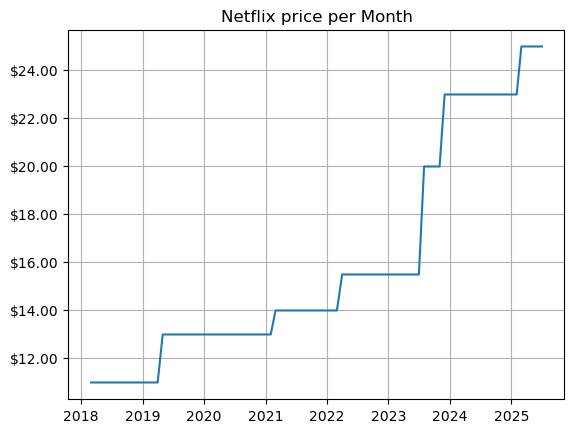

In [19]:
%matplotlib inline

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits

cost_fig, cost_ax = plt.subplots()
cost_ax.set_title("Netflix price per Month")
cost_ax.plot(df_billing['Date'], df_billing['Gross Sale Amt'])
cost_ax.yaxis.set_major_formatter(lambda x, _: f'${x:1.2f}')
plt.grid(visible=True)

## Combine data

We can now merge the two dataframes.

In [20]:
df = pd.merge(df_billing, df_views_by_month, how='left', left_on='Date', right_on='Date')
df['Dollars per Hour'] = df['Gross Sale Amt'] / df['total_hours']
df.head()

,Transaction Date,Final Invoice Result,Mop Pmt Processor Desc,Pmt Txn Type,Description,Gross Sale Amt,Pmt Status,Tax Amt,Service Period Start Date,Item Price Amt,Mop Creation Date,Currency,Next Billing Date,Service Period End Date,Date,Duration,total_hours,Dollars per Hour
0,2025-07-01 00:00:00+00:00,SETTLED,HELIX,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-07-01 00:00:00+00:00,24.99,2024-03-01 00:00:00+00:00,USD,2025-08-01 00:00:00+00:00,2025-07-31 00:00:00+00:00,2025-07-01 00:00:00+00:00,4 days 05:06:47,101.113056,0.247149
1,2025-06-01 00:00:00+00:00,SETTLED,HELIX,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-06-01 00:00:00+00:00,24.99,2024-03-01 00:00:00+00:00,USD,2025-07-01 00:00:00+00:00,2025-06-30 00:00:00+00:00,2025-06-01 00:00:00+00:00,2 days 14:38:37,62.643611,0.398923
2,2025-05-01 00:00:00+00:00,SETTLED,ADYEN,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-05-01 00:00:00+00:00,24.99,2024-03-01 00:00:00+00:00,USD,2025-06-01 00:00:00+00:00,2025-05-31 00:00:00+00:00,2025-05-01 00:00:00+00:00,3 days 22:04:39,94.077500,0.265632
3,2025-04-01 00:00:00+00:00,SETTLED,VANTIV,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-04-01 00:00:00+00:00,24.99,2024-03-01 00:00:00+00:00,USD,2025-05-01 00:00:00+00:00,2025-04-30 00:00:00+00:00,2025-04-01 00:00:00+00:00,1 days 04:56:16,28.937778,0.863577
4,2025-03-01 00:00:00+00:00,SETTLED,VPP,SALE,SUBSCRIPTION,24.99,APPROVED,0.0,2025-03-01 00:00:00+00:00,24.99,2024-03-01 00:00:00+00:00,USD,2025-04-01 00:00:00+00:00,2025-03-31 00:00:00+00:00,2025-03-01 00:00:00+00:00,2 days 01:36:29,49.608056,0.503749


### Visualize

Now we can chart the data. We'll create two charts, one that combines the viewing data and the billing data, and another that charts the Dollars per hour.

Text(0, 0.5, 'Cost Per Month ($)')

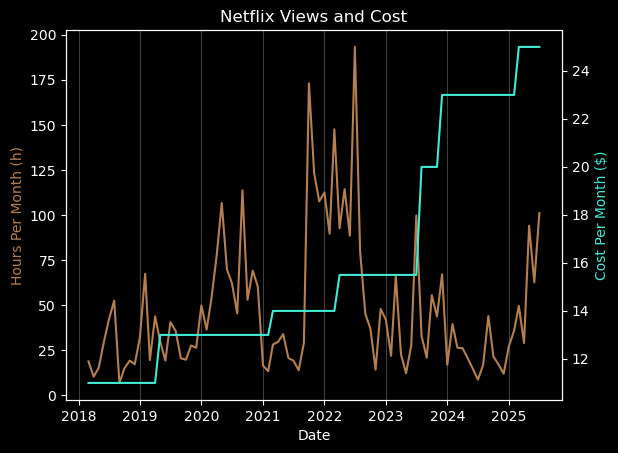

In [21]:
bg_color = '#2E5266'
ax1_color = '#b57f50'
ax2_color = '#41ead4'
ax3_color = '#B57F50'
plt.style.use('dark_background')

vb_fig, vb_ax1 = plt.subplots()
vb_ax1.set_facecolor = bg_color

vb_ax1.set_title("Netflix Views and Cost")
vb_ax1.plot(df.Date, df.total_hours, color = ax1_color)
vb_ax1.set_xlabel('Date')
vb_ax1.set_ylabel('Hours Per Month (h)', color = ax1_color)
vb_ax1.grid(axis='x', alpha=0.25)

vb_ax2 = vb_ax1.twinx()
vb_ax2.plot(df.Date, df['Gross Sale Amt'], color = ax2_color)
vb_ax2.set_ylabel('Cost Per Month ($)', color = ax2_color)

For the `Dollars per Hour` chart there is an inverse relationship to value, so the higher the number the worse value of the subscription. We will flip the Y-Axis to better show this fact.

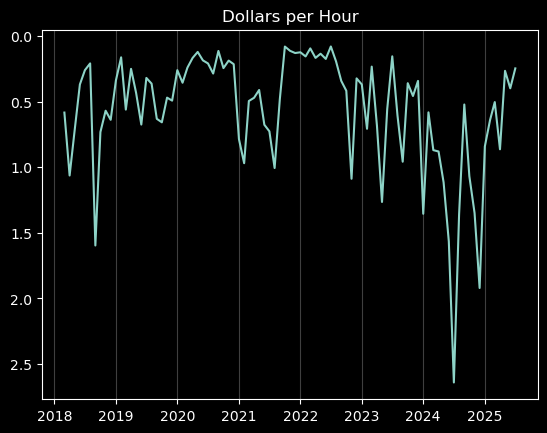

In [22]:
from collections import namedtuple
Point = namedtuple('Point', 'x y')

dph_x = df.Date
dph_y = df['Dollars per Hour']

dph_fig, dph_ax = plt.subplots()
dph_ax.set_title('Dollars per Hour')
dph_ax.plot(df.Date, df['Dollars per Hour'])
dph_ax.invert_yaxis()
dph_ax.grid(axis='x', alpha=0.25)

The data seems to have a general trend, but it's hard to see here. We can add a trend line to make this clearer.

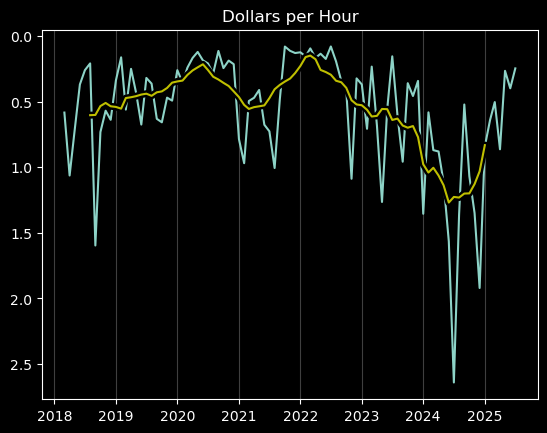

In [23]:
import matplotlib.patheffects as pe

dph_trend = df['Dollars per Hour'].rolling(window=12, center=True).mean()
dph_ax.plot(df.Date, dph_trend, color='y', path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
dph_fig

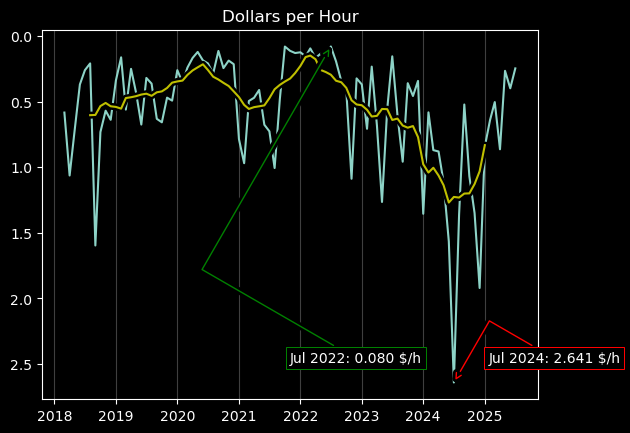

In [24]:
dph_max_color = 'red'
dph_min_color = 'green'

dph_max = Point(dph_x[np.argmax(dph_y)], dph_y.max())
dph_min = Point(dph_x[np.argmin(dph_y)], dph_y.min())

dph_max_box = dict(boxstyle="square,pad=0.3", fc="k", ec=dph_max_color, lw=0.72)
dph_min_box = dict(boxstyle="square,pad=0.3", fc="k", ec=dph_min_color, lw=0.72)

dph_max_arrow = dict(arrowstyle="->",connectionstyle="angle,angleA=-30,angleB=60", color=dph_max_color, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
dph_min_arrow = dict(arrowstyle="->",connectionstyle="angle,angleA=-30,angleB=60", color=dph_min_color, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])

dph_max_kw = dict(xycoords='data', textcoords="axes fraction", arrowprops=dph_max_arrow, bbox=dph_max_box)
dph_min_kw = dict(xycoords='data', textcoords="axes fraction", arrowprops=dph_min_arrow, bbox=dph_min_box)

dph_ax.annotate(f"{dph_max.x:%b %Y}: {dph_max.y:0.3f} $/h", xy=dph_max, xytext=(.9, 0.1), **dph_max_kw)
dph_ax.annotate(f"{dph_min.x:%b %Y}: {dph_min.y:0.3f} $/h", xy=dph_min, xytext=(.5, 0.1), **dph_min_kw)
dph_fig